<a href="https://colab.research.google.com/github/YahyaAlaaMassoud/cv-iti-24/blob/main/lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install torchsummary

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for cats_vs_dogs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cats_vs_dogs
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(

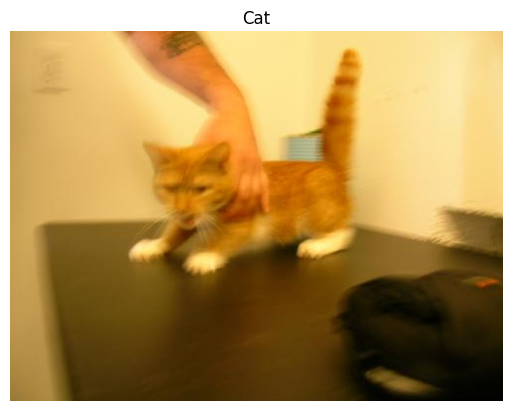

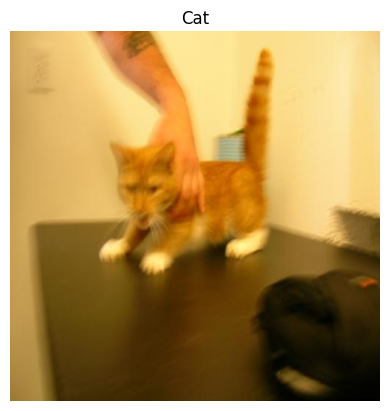

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from datasets import load_dataset


def fetch_cat_image(dataset):
    for item in dataset['train']:
        if item['labels'] == 0:  # Assuming '0' is the label for cats
            return item['image']
    return None  # Return None if no cat image is found


def visualize_image(image):
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Cat')
    plt.show()


def resize_image(image, size=(500, 500)):
    return image.resize(size)


dataset = load_dataset("cats_vs_dogs")

# Fetch a cat image
cat_image = fetch_cat_image(dataset)

if cat_image is not None:
    # Visualize the cat image
    visualize_image(cat_image)

    # Resize the cat image
    resized_cat_image = resize_image(cat_image)

    # Optionally visualize the resized image
    visualize_image(resized_cat_image)
else:
    print("No cat images found in the dataset.")

![](https://miro.medium.com/v2/resize:fit:2000/1*1TI1aGBZ4dybR6__DI9dzA.png)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        # Average Pooling layer
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # Applying the first convolution and pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        # Applying the second convolution and pooling layers
        x = self.pool(F.relu(self.conv2(x)))
        # Flattening the output for the fully connected layer
        x = x.view(-1, 16 * 5 * 5)
        # Applying the fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Create the LeNet5 model instance
model = LeNet5()

# Summary of LeNet5 using torchsummary
summary(model, input_size=(1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------
